# Numpy와 Scipy를 이용한 수치 계산
---
## Numpy 특징


* Numerical Python


* 수식 계산을 위한 함수들이 속도가 빠른 저수준 언어로 작성되어 있음


* 다차원 배열 및 행렬을 쉽게 다룰 수 있는 도구들 제공


* 선형대수, 푸리에변환, 난수발생기 포함


---
## Scipy 특징


* Scientific Python


* Numpy를 확장하여 최적화, 회귀, 적분, 신호처리, 통계, 방정식 풀이, 특수함수 등을 지원


* Numpy + Scipy + Matplotlib + Pandas 은 과학/공학 계산을 위한 최적의 조합

---
## 버전 확인

In [1]:
import numpy
import scipy
print('Numpy version: {}'.format(numpy.__version__))
print('Scipy version: {}'.format(scipy.__version__))

Numpy version: 1.11.3
Scipy version: 0.18.1


---
## 첫 번째 예제

### 섭씨 온도를 화씨 온도로 바꾸기

다음 표는 우리나라 월평균 기온이다(1971년~2000년 평균값, 출처:기상청).

구분|1월|2월|3월|4월|5월|6월|7월|8월|9월|10월|11월|12월
:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:
최저기온(℃)|-6.1|-4.1|1.1|7.3|12.6|17.8|21.8|22.1|16.7|9.8|2.9|-3.4
최고기온(℃)|1.6|4.1|10.2|17.6|22.8|26.9|28.8|29.5|25.6|19.7|11.5|4.2

섭씨온도(C)에서 화씨온도(F)로 바꾸는 식은 다음과 같다.
$$F=\frac{9}{5}C+32$$

우리나라 월평균 최저기온을 화씨로 바꿔보자.

In [2]:
import numpy as np

temp_c = [-6.1, -4.1, 1.1, 7.3, 12.6, 17.8, 21.8, 22.1, 16.7, 9.8, 2.9, -3.4]

# without Numpy
temp_f = [x*9/5+32 for x in temp_c]
print(temp_f)

# using Numpy
c = np.array(temp_c)
f = c*9/5 + 32
print(f)

[21.02, 24.62, 33.98, 45.14, 54.68, 64.04, 71.24000000000001, 71.78, 62.059999999999995, 49.64, 37.22, 25.880000000000003]
[ 21.02  24.62  33.98  45.14  54.68  64.04  71.24  71.78  62.06  49.64
  37.22  25.88]


6번 라인은 Numpy를 사용하지 않고 List comprehension을 이용하였다.

10번 라인에서 temp_c 리스트를 Numpy 배열로 변환하고, 11번 라인에서 화씨로 변환하였다.

간단한 예제라서 Numpy의 강점이 두드러지지 않을 수 있다. 이 두 방법의 중요한 차이는 리스트는 명시적으로 for 루프를 통해 값을 하나씩 계산하는 것이고, Numpy 배열은 암시적 루프를 사용한다는 것이다. 배열의 크기가 상당히 클 때에는 명시적인 for 루프는 Numpy 배열에 비해 수십에서 수백 배 느려질 수 있다. 뭔가 숫자가 많은 자료를 계산하고 싶다면 다음을 반드시 기억해야 한다.

* **숫자로 채워진 배열은 파이썬 컨테이너(List, Dictionary, 등)가 아닌 Numpy 배열을 이용한다.**

* **Numpy 배열 인덱스에는 매우 부득이한 경우가 아니고는 for 루프를 사용하지 않는다.**

---
## Numpy 배열 생성

### 등간격 배열

Numpy에서 등간격 배열을 선언하는 함수는 arange()와 linspace() 두 개가 있다. arange()는 시작값과 끝값 사이를 주어진 **간격**으로 배열로 만들고, linspace()는 시작값과 끝값 사이를 주어진 **개수**로 배열을 만든다.

In [3]:
import numpy as np

a1 = np.arange(5) 
print('a1)', a1, a1.dtype)

a2 = np.arange(5.)
print('a2)', a2, a2.dtype)

a3 = np.arange(5.1)
print('a3)', a3, a3.dtype)

a4 = np.arange(1.5, 5.1, 0.8)
print('a4)', a4, a4.dtype)

a1) [0 1 2 3 4] int32
a2) [ 0.  1.  2.  3.  4.] float64
a3) [ 0.  1.  2.  3.  4.  5.] float64
a4) [ 1.5  2.3  3.1  3.9  4.7] float64


문법: arange([start,], stop[, step,], dtype=None)

배열 a1은 끝점이 5라는 의미이다. 시작점은 0, 간격은 1이 기본값이며 np.arange(0,5,1)과 동일하다. 생성된 배열은 0부터 1 간격으로 4까지이다. 끝점 5는 포함되지 않는 것에 주의해야 한다. 

배열 a2는 끝점이 정수가 아니라 부동소수점 숫자(float)로 주어졌을 때 생성되는 배열도 float 형으로 주어짐을 보여준다. 파이썬에서 float형은 single precision(32bit, 4byte)이 아니라 double precision(64bit, 8byte)이 기본형이다.

배열 a3는 끝점이 5.1인 경우에는 float형으로 0.부터 5.까지의 배열이 생성된다. 앞의 두 배열과는 다르게 숫자 5.이 포함된 것에 유의하라.

배열 a4는 시작점과 간격을 각각 0.5, 0.8로 명시적으로 준 경우이다.

In [4]:
import numpy as np

a6 = np.linspace(1, 10, 7) 
print('a6)', a6)

a7 = np.linspace(1, 10, 7, endpoint=False) 
print('a7)', a7)

a8, step = np.linspace(1, 10, 7, endpoint=False, retstep=True) 
print('a8)', a8, step)

a6) [  1.    2.5   4.    5.5   7.    8.5  10. ]
a7) [ 1.          2.28571429  3.57142857  4.85714286  6.14285714  7.42857143
  8.71428571]
a8) [ 1.          2.28571429  3.57142857  4.85714286  6.14285714  7.42857143
  8.71428571] 1.2857142857142858


문법: linspace(start, stop, num=50, endpoint=True, retstep=False)

배열 a6은 시작점 1부터 끝점 10 사이를 7개의 등간격 값으로 만든 배열이다. 끝점 포함이 기본 옵션임을 유의하라.

배열 a7은 a6와 동일한데 endpoint옵션을 False로 한 결과이다. a6 배열의 간격값이 1.5인 것에 비해, a7 배열의 간격값은 약 1.29로 줄어든 것에 유의하라. a6 배열의 간격값은 (10-1)/(7-1)이고, a7 배열의 간격값은 (10-1)/7이기 때문이다.

linspace() 함수의 마지막 옵션 retstep을 True로 하면 간격값도 함께 반환해준다.

### Numpy 배열 생성과 List 생성 속도 비교

두 개의 배열을 생성한 후 그 두개를 더하는 연산을 Numpy 배열을 사용한 경우와 List를 사용하는 경우의 실행 시간을 비교해 보자. 실행시간 측정은 파이썬의 datetime 모듈을 이용한다.

In [5]:
from datetime import datetime
import numpy as np

def list_version(a, n):
# using List
    t1 = datetime.now()
    x = range(n)
    y = range(n)
    z = []
    for i in range(len(x)):
        z.append(a*x[i] + y[i])
    t2 = datetime.now()
    return t2 - t1

def numpy_version(a, n):
    t1 = datetime.now()
    x = np.arange(n)
    y = np.arange(n)
    z = a*x + y
    t2 = datetime.now() 
    return t2 - t1

a = 1.2
n = 10000000
dt1 = list_version(a, n)
dt2 = numpy_version(a, n)
print('size =', n)
print('List version :', dt1)
print('Numpy version:', dt2)
print('The Numpy version is {:.2f} faster!'.format(dt1/dt2))

size = 10000000
List version : 0:00:05.277302
Numpy version: 0:00:00.087005
The Numpy version is 60.66 faster!


### 1차원, 2차원, 다차원 배열 생성

앞의 예제에서 arange()와 linspace() 함수로 이미 1차원 배열은 생성해 보았다. 이 외에도 배열 생성을 위해 자주 사용하는 방법들을 소개한다.

* np.array()
* np.zeros()
* np.ones()

In [6]:
a1 = np.array([4,5,6,8,9,11])
print('a1={}, dtype={}, ndim={}, shape={}'.format(a1, a1.dtype, a1.ndim, a1.shape))

a2 = np.array([1.2, 3.4, 6.9, 5.2, 11.7])
print('a2={}, dtype={}, ndim={}, shape={}'.format(a2, a2.dtype, a2.ndim, a2.shape))

a3 = np.array([[ 1,  1,  2,  3], 
               [ 5,  8, 13, 21],
               [34, 55, 89,144]])
print('a3=\n{}, dtype={}, ndim={}, shape={}'.format(a3, a3.dtype, a3.ndim, a3.shape))

a1=[ 4  5  6  8  9 11], dtype=int32, ndim=1, shape=(6,)
a2=[  1.2   3.4   6.9   5.2  11.7], dtype=float64, ndim=1, shape=(5,)
a3=
[[  1   1   2   3]
 [  5   8  13  21]
 [ 34  55  89 144]], dtype=int32, ndim=2, shape=(3, 4)


a1, a2, a3 배열은 모두 np.array() 함수를 이용하여 List로부터 Numpy 배열로 변환된 것이다. Numpy 배열의 내장 속성 dtype, ndim, shape으로 데이터 타입, 차원, 배열 모양을 알 수 있다.


a1과 a2 배열은 1차원 배열이고, a3 배열은 2차원 배열이다. 2차원 배열의 축 방향은 아래 그림과 같다. 일반적으로 행렬을 표현하는 방향과 동일하게 axis 0(행)과 axis 1(열)이 정의된다.

<img src="png/numpy_axes.png" alt="fig:Numpy Axes" style="width: 200px;float:left">

In [7]:
a4 = np.zeros((3,3), 'i4')
print('a4=\n{}, dtype={}, ndim={}, shape={}'.format(a4, a4.dtype, a4.ndim, a4.shape))

a5 = np.ones((3,3,4), 'f4')
print('a5=\n{}, dtype={}, ndim={}, shape={}'.format(a5, a5.dtype, a5.ndim, a5.shape))

a4=
[[0 0 0]
 [0 0 0]
 [0 0 0]], dtype=int32, ndim=2, shape=(3, 3)
a5=
[[[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]], dtype=float32, ndim=3, shape=(3, 3, 4)


a4와 a5 행렬은 zeros()와 ones() 함수를 이용하여 초기화된 배열을 생성한다. zeros()는 0으로 ones()는 1로 초기화한다. 첫 번째 인자는 배열의 shape을 지정해 준다. 두 번째 인자는 dtype을 문자열로 간단히 표기한 것이다. 'i'는 int형, 'f'는 float형이고, '4'는 4 byte(32 bit, single precision)을 의미한다. 만약 float 8 byte(64bit)로 만들고 싶다면 'f8'이라고 인자를 주면 된다.

---
## Indexing and Slicing

배열의 요소에 접근하는 방법은 List나 Tuple 객체에 접근하는 방법과 동일하며, slicing을 이용하여 배열의 임의의 영역으로의 접근을 쉽고 직관적으로 할 수 있다.

In [8]:
import numpy as np

a1 = np.array([1, 1, 2, 3, 5, 8, 13, 21])
print('a1: ', a1)
print('the first element a[0]=', a1[0])
print('the last element  a[-1]=', a1[-1])
print('a1[4]={}, a1[-4]={}'.format(a1[4], a1[-4]))

a2 = np.array([[[111, 112], [121, 122]],
               [[211, 212], [221, 222]],
               [[311, 312], [321, 322]]])
print('\na2[1,1,0]=', a2[1,1,0])

a1:  [ 1  1  2  3  5  8 13 21]
the first element a[0]= 1
the last element  a[-1]= 21
a1[4]=5, a1[-4]=5

a2[1,1,0]= 221


첫 번째 요소 인덱스는 0, 마지막 요소 인덱스는 -1이다. 파이썬은 앞에서부터는 0부터 1씩 증가하는 인덱스를 사용할 수도 있고, 뒤에서부터는 -1부터 1씩 감소하는 인덱스를 사용할 수도 있다. 7번 라인에서처럼 앞에서부터 5번째 요소(a1[4])와 뒤에서부터 4번째(a1[-4]) 요소가 동일하다.

다차원 배열일 때는 각 축의 인덱스를 12번 라인과 같이 쉼표로 구분하여 적어준다.

In [9]:
import numpy as np

a1 = np.array([1, 1, 2, 3, 5, 8, 13, 21])
print('a1: ', a1)
print('a1[2:6]  ', a1[2:6])
print('a1[2:-2] ', a1[2:-2])
print('a1[-6:-2]', a1[-6:-2])
print('a1[-6:-2:2]', a1[-6:-2:2])
print('a1[::-1]', a1[::-1])

a1:  [ 1  1  2  3  5  8 13 21]
a1[2:6]   [2 3 5 8]
a1[2:-2]  [2 3 5 8]
a1[-6:-2] [2 3 5 8]
a1[-6:-2:2] [2 5]
a1[::-1] [21 13  8  5  3  2  1  1]


배열의 일부분만을 참고할 때(slicing)의 기본 문법은 다음과 같다.

**arr[start:stop:step]**

slicing에서 주의해야 할 점은 시작점과 끝점이 앞의 예제에서의 index와는 개념이 좀 다르다는 것이다. 아래 그림은 index와 slice의 미묘한 차이를 명쾌하게 보여준다. index는 한 개 요소를 지칭할 때 사용되고 이것은 배열 개개의 요소와 일대일로 대응한다. 그러나 slice는 배열의 요소에 대응하는 것이 아니라 그 경계를 의미한다고 보는 게 더 편리하다.

5번 라인에서 a1[2:6]은 1,2번 index 경계부터 시작해서 5,6번 경계에서 끝난다고 보면, index는 [2, 3, 4, 5]에 해당되며 데이터는 [2, 3, 5, 8]이 된다. 6번, 7번 라인에서와 같이 동일한 데이터 영역을 다양한 slice로 표현 가능하다.

step은 주어진 데이터 영역에서 몇 개씩 건너뛰느냐를 의미하며 기본값이 1이다. 8번 라인에서 2씩 건너뛸 때의 결과를 보여준다. step을 음수를 주면 배열 방향이 반대가 되는데 이를 응용하면 9번 라인과 같이 뒤집어진 배열을 쉽게 구할 수 있다.

<img src="png/slice.png" alt="fig:Numpy Slicing" style="width: 400px;float:left">

slicing은 파이썬에서 배열을 다루는 데 매우 유용하므로 몇 가지 예제들을 더 살펴보자.

a[:3,2:]
 
<img src="png/slice_ex1.png" alt="fig:a[:3,2:]" style="width: 300px;float:left">

a[3:,]

<img src="png/slice_ex2.png" alt="fig:a[3:,:]" style="width: 300px;float:left">

a[:,4:]

<img src="png/slice_ex3.png" alt="fig:a[:,4:]" style="width: 300px;float:left">

아래 두 예제는 step 옵션을 사용하였다.

a[::,::3]

<img src="png/slice_ex4.png" alt="fig:a[::,::3]" style="width: 300px;float:left">

a[::2,::3]

<img src="png/slice_ex5.png" alt="fig:a[::2,::3]" style="width: 300px;float:left">

## 주의 사항: view냐? copy냐?

Slicing은 Numpy 배열 뿐만 아니라 List와 Tuple에도 동일하게 적용된다. 그런데 이들 사이에는 큰 차이점이 있다. Numpy 배열의 slicing은 원래의 배열을 참고만 하는(view) 반면에, List와 Tuple의 slicing은 복사(copy)를 한다. 따라서 Numpy 배열에 slicing을 하면 원본 배열의 값이 바뀌지만, List와 Tuple은 원본이 바뀌지 않는다. 예제를 통해 확인해보자.

In [10]:
import numpy as np

# List slicing
lst = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sub_lst = lst[2:6]
sub_lst[0] = 22
sub_lst[1] = 23
print('lst', lst)

# Numpy slicing
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
sub_arr = arr[2:6]
sub_arr[0] = 22
sub_arr[1] = 23
print('arr', arr)

lst [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
arr [ 0  1 22 23  4  5  6  7  8  9]


위의 예제에서 List와 Numpy 배열 모두 slicing을 통해 서브 객체를 각각 생성하고, 그 서브 객체의 값을 일부 수정하였다. List의 경우에는 slicing으로 복사(copy)를 하여 새로운 객체가 생성되어 원본에 영향을 미치지 않았고, Numpy 배열의 경우에는 slicing으로 원본 배열의 view 객체를 생성하였으므로 원본이 변경되었다. 

slicing 배열이 원본 배열과 view 관계를 갖는다는 건 양날의 칼이다. slicing 배열이 독자적인 index를 가지므로 복잡한 배열 패턴을 쉽게 처리할 수 있는 강력한 도구가 되기도 하지만, 의도하지 않게 원본 배열의 값을 변화시킬 수도 있으므로 주의깊게 다뤄야 할 때도 있다. 원본 배열의 값이 수정되지 않아야 할 때에는 slicing의 결과를 copy() 함수를 이용하여 복사하는 것이 안전하다. 일반적으로 copy보다는 view가 계산 성능에 더 유리하다. 

Numpy는 두 배열이 view 관계인지(하나의 원본 배열의 서로 다른 view) 아닌지를 체크해주는 함수 may_share_memory()가 있다. 이 함수를 이용하여 view인지 copy인지 확인해 보자.

In [11]:
import numpy as np

arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# view
view_arr = arr[2:6]
print('may_share_memory(arr, view_arr):', np.may_share_memory(arr, view_arr))

# copy
copy_arr = arr[2:6].copy()
print('may_share_memory(arr, copy_arr):', np.may_share_memory(arr, copy_arr))
print('may_share_memory(view_arr, copy_arr):', np.may_share_memory(view_arr, copy_arr))

# check two views
view_arr2 = arr[4:]
print('may_share_memory(view_arr, view_arr2):', np.may_share_memory(view_arr, view_arr2))

may_share_memory(arr, view_arr): True
may_share_memory(arr, copy_arr): False
may_share_memory(view_arr, copy_arr): False
may_share_memory(view_arr, view_arr2): True


7번 라인의 slicing은 원본과 view 관계이다.

10번 라인의 slicing 후 copy한 배열은 원본과 view 관계가 아니다.

15번 라인의 또 다른 slicing은 7번 라인의 slciing과 동일한 배열의 각기 다른 view이다.

다음 예제는 may_share_memory() 함수를 이용하여 reshape() 함수의 결과가 view 관계인지를 보여준다.

In [12]:
import numpy as np

arr = np.arange(12)
arr2 = arr.reshape(3,4)
arr[2] = 777

print('arr is arr2:', arr is arr2)
print('arr:', arr)
print('arr2:\n', arr2)
print('may_share_memory(arr, arr2):', np.may_share_memory(arr, arr2))

arr is arr2: False
arr: [  0   1 777   3   4   5   6   7   8   9  10  11]
arr2:
 [[  0   1 777   3]
 [  4   5   6   7]
 [  8   9  10  11]]
may_share_memory(arr, arr2): True


3번 라인의 배열로부터 4번 라인의 (3,4) shape 배열이 새로 생성되었다. 첫 번째 배열은 1차원 배열이고, 두 번째 배열은 2차원 배열임에도 불구하고, 두 배열은 view 관계이다. 5번 라인에서 첫 번째 배열의 값을 수정하였더니, 두 번째 배열의 값도 수정됨을 확인할 수 있다. 두 배열의 may_share_memory() 함수의 결과는 역시 True이다.

---
## Numpy 배열과 수학 연산자

Numpy 배열에 적용되는 수학 연산은 기본적으로 broadcasting이다. 예를 들어, 하나의 Numpy 배열 a에 상수 2를 더하려면 단순히 a+2 하면 모든 배열 요소에 2가 더해진다. Numpy에서 제공하는 수학 함수들은 모두 broadcasting 방식으로 적용되며, 배열과 배열 사이의 연산도 동일하다.

### Scalar와의 연산

In [13]:
import numpy as np

v = np.array([2,3, 7.9, 3.3, 6.9, 0.11, 10.3, 12.9])
print('v+2:', v+2)
print('v-2:', v-2)
print('v*2:', v*2)
print('v/2:', v/2)
print('v**2:', v**2)

v+2: [  4.     5.     9.9    5.3    8.9    2.11  12.3   14.9 ]
v-2: [  0.     1.     5.9    1.3    4.9   -1.89   8.3   10.9 ]
v*2: [  4.     6.    15.8    6.6   13.8    0.22  20.6   25.8 ]
v/2: [ 1.     1.5    3.95   1.65   3.45   0.055  5.15   6.45 ]
v**2: [  4.00000000e+00   9.00000000e+00   6.24100000e+01   1.08900000e+01
   4.76100000e+01   1.21000000e-02   1.06090000e+02   1.66410000e+02]


### 두 배열 사이의 연산

Numpy 배열들 간의 연산c도 broadcasting으로 동작한다. 단, 두 배열의 shape은 동일해야 한다.

In [14]:
import numpy as np

a = np.arange(12).reshape(3,4)
b = np.ones((3,4))
print('a=\n', a)
print('b=\n', b)
print('a+b=\n', a+b)
print('a + 2*(b+1)=\n', a + 2*(b+1))

a=
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
b=
 [[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
a+b=
 [[  1.   2.   3.   4.]
 [  5.   6.   7.   8.]
 [  9.  10.  11.  12.]]
a + 2*(b+1)=
 [[  4.   5.   6.   7.]
 [  8.   9.  10.  11.]
 [ 12.  13.  14.  15.]]


### 배열과 수학 연산자

Numpy가 제공하는 수학 연산자들도 인자로 주어지는 배열들에 broadcasting으로 동작한다.

In [15]:
import numpy as np

a = np.arange(12).reshape(3,4)
print('sin(a)=\n', np.sin(a))
print('exp(a)=\n', np.exp(a))


sin(a)=
 [[ 0.          0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155   0.6569866 ]
 [ 0.98935825  0.41211849 -0.54402111 -0.99999021]]
exp(a)=
 [[  1.00000000e+00   2.71828183e+00   7.38905610e+00   2.00855369e+01]
 [  5.45981500e+01   1.48413159e+02   4.03428793e+02   1.09663316e+03]
 [  2.98095799e+03   8.10308393e+03   2.20264658e+04   5.98741417e+04]]


### 배열과 행렬

Numpy 배열과 행렬은 거의 동일하게 사용되지만 약간 다를 때가 있다. 대표적인 것이 행렬 곱셈이다. 배열x배열은 모든 배열 요소끼리 일대일로 곱셈을 하는 것임에 반해, 행렬x행렬은 첫 번째 행렬의 행과 두 번째 행렬의 열의 요소들을 각각 곱한 다음 더한다. 이런 행렬에 특화된 연산을 위해 Numpy는 행렬 객체를 따로 정의하고 있다. 

In [16]:
import numpy as np

a = np.array([[1, 2, 3], [2, 2, 2], [3, 3, 3]])
b = np.array([[3, 2, 1], [1, 2, 3], [-1, -2, -3]])
print('Two arrays a*b=')
print(a*b)

ma = np.mat(a)
mb = np.mat(b)
print('Two matrices ma*mb=')
print(ma*mb)

Two arrays a*b=
[[ 3  4  3]
 [ 2  4  6]
 [-3 -6 -9]]
Two matrices ma*mb=
[[ 2  0 -2]
 [ 6  4  2]
 [ 9  6  3]]


---
## 그 외 유용한 Numpy 기능들


* 자유롭게 배열의 모양(shape)을 바꿀 수 있다.
 * 다차원->1차원: flatten(), ravel()
 * reshape()


* 여러 개의 배열을 붙이거나 잘라낼(slicing) 수 있다.
 * concatenate()
 * row_stack(), column_stack()
 * tile()
 
 
* Boolean 조건으로 배열을 쉽게 마스킹(masking)할 수 있다.
 * nonzero()
 * where()
  
 
* 다양한 random number들을 생성할 수 있다.
 * numpy.random 모듈
 
 
* 쉬운 아스키, 바이너리 파일 입출력
 * savetxt(), loadtxt()
 * tofile(), fromfile()

## 도움이 필요할 땐


* Numpy 도움말 - 생각보다 유용하다. 여기서 함수 이름을 찾고 구글신에게 여쭤보면 됨.
 * np.array?
 * np.lookfor('create array')
 * np.con*?


* [Stack Overflow](https://stackoverflow.com) - 거의 모든 에러 대처방안이 있음. 예제도 풍부.


* [Numpy 공식 레퍼런스 웹사이트](https://docs.scipy.org/doc/numpy/reference) - 결국엔 매뉴얼이다

---
## Numpy 실습 - 2차원 파동 시뮬레이션


호수에 돌을 던지면 원형으로 퍼지는 물결파를 볼 수 있다. 2차원 파동 방정식을 풀면 이와 같은 원형 파동을 시뮬레이션 할 수 있다. 간단한 시뮬레이션 코드를 Numpy 배열을 이용하여 구현해 보자.


2차원 파동 방정식은 다음과 같이 시간과 공간에 대한 2차 미분으로 이루어져 있다.


$$\frac{\partial^2 u}{\partial t^2} = a^2\biggl{(} \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \biggr{)}$$


수치 미분을 위해 중심차분방법(Central Finite-Difference Method)를 이용하여 미분항을 이산화하면 다음과 같다.


$$\frac{\partial^2 u}{\partial t^2} \simeq \frac{u\bigl|^{n-1}_{i,j} - 2u\bigl|^{n}_{i,j} + u\bigl|^{n+1}_{i,j}}{\Delta^2_t}$$


$$\frac{\partial^2 u}{\partial x^2} \simeq \frac{u\bigl|^{n}_{i-1,j} - 2u\bigl|^{n}_{i,j} + u\bigl|^{n}_{i+1,j}}{\Delta^2_x}$$


윗첨자 $n$은 시간을 이산화한 인덱스로 $n$은 현재 타임스텝, $n-1$은 이전 타임스텝, $n+1$은 다음 타임스텝을 의미한다. 아래첨자 $i,j$는 2차원 공간을 이산화한 인덱스로 $i-1, i+1$들은 좌우 격자점들을, $j-1, j+1$들은 아래위 격자점들을 의미한다. 이 식들을 방정식에 대입하여 정리하면, 다음과 같다.


$$u\bigl|^{n+1}_{i,j} = \biggl{(} a\frac{\Delta_t}{\Delta_x} \biggr{)}^2 \biggl{(} u\bigl|^{n}_{i-1,j} + u\bigl|^{n}_{i+1,j} + u\bigl|^{n}_{i,j-1} + u\bigl|^{n}_{i,j+1} -4u\bigl|^{n}_{i,j} \biggr{)} + 2u\bigl|^{n}_{i,j} - u\bigl|^{n-1}_{i,j} $$


편의상 $\biggl{(} a\frac{\Delta_t}{\Delta_x} \biggr{)}^2 = 0.25$ 라고 하자.


### 주의: Jupyter notebook에서 바로 실행하지 말고, 터미널 창에서 코드로 작성하여 실행할 것

### 버전 1 - for 루프로 무식하게 시작해보자

에러를 해결해 봅시다.

IndexError: index 80 is out of bounds for axis 1 with size 80

### 버전 2 - for 루프 대신 slicing 사용

### 버전 3 - 함수로 정리

---
## Scipy 예제 (1) - 함수의 극값

1종 베셀(Bessel)의 차수(order)가 3일 때, x=5 근방에서의 극값을 찾아보자.

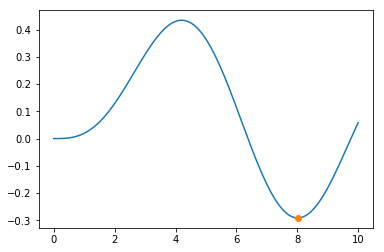

In [17]:
from scipy import special, optimize
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: special.jv(3, x)  # order=3
sol = optimize.minimize(f, 5.0) # initial guess

x = np.linspace(0, 10, 5000)
plt.plot(x, special.jv(3,x), '-')
plt.plot(sol.x, sol.fun, 'o')
plt.show()

## Scipy 예제 (2) - Root finding


다음 비선형 방정식의 해를 찾아보자.


$$x + 2\cos(x) = 0$$

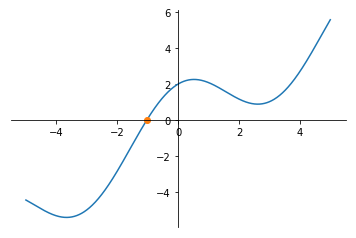

In [18]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x + 2*np.cos(x)
x0 = fsolve(f, 0.3)  # initial guess

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

x = np.linspace(-5, 5, 1000)
ax.plot(x, f(x), '-')
ax.plot(x0, f(x0), 'o')

plt.show()

## Scipy 예제 (3) - Spline interpolation


Cubic-spline을 이용하여 주어진 자료들의 내삽값들을 구해보자.

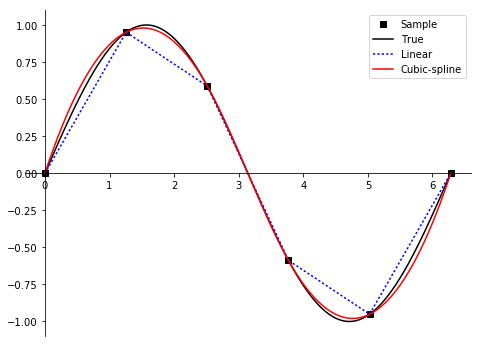

In [22]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

data_x = np.linspace(0, 2*np.pi, 6)
data_y = np.sin(data_x)

tck = interpolate.splrep(data_x, data_y, s=0)
xnew = np.linspace(0, 2*np.pi, 1000)
ynew = interpolate.splev(xnew, tck, der=0)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

ax.plot(data_x, data_y, 'ks', label='Sample')
ax.plot(xnew, np.sin(xnew), 'k-', label='True')
ax.plot(data_x, data_y, 'b:', label='Linear')
ax.plot(xnew, ynew, 'r-', label='Cubic-spline')
ax.legend()

plt.show()

---
## 참고 자료
* [Numpy Reference Guide](https://docs.scipy.org/doc/numpy/reference)
* [Scipy Reference Guide](https://docs.scipy.org/doc/scipy/reference)
* [Python Course](http://www.python-course.eu)
* [Scipy Lecture Notes](http://www.scipy-lectures.org)
* [Lectures on scientific computing with Python](https://github.com/jrjohansson/scientific-python-lectures#online-read-only-versions)